# MLAdditional_Excercise_24.21442

Use scikit learn’s LogisticRegression class to model and make predictions on the
following two datasets:

1) https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

Using the model, make predictions of the demand for bikes when the windspeed is
minimum and maximum. Plot the ROC curve.

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
# Read the folder and get the details inside folder
data_list = glob('./Bike-Sharing-Dataset/*')

In [3]:
data_list

['./Bike-Sharing-Dataset\\day.csv',
 './Bike-Sharing-Dataset\\hour.csv',
 './Bike-Sharing-Dataset\\Readme.txt']

In [4]:
# Read the first file
day_df = pd.read_csv(data_list[0])

In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


The problem we are solving is to model the demand of the bikes. If we observe in the dataset, the last column which says “cnt” gives us the total bikes used on a particular day. This will be our target column. However, this column contains continuous values. In order to build a logistic regression model, we should have a target variable which is discrete. Hence let’s convert the particular column into a categorical column by thresholding it on a particular value. Let’s check a five-num summary of the target column.

In [7]:
#Identify the target variable and get the stats.
day_df.iloc[:,-1].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

This show that avg demand of the bike per day has been around 4504. Since we are trying to predict a number which shows a higher demand. Let’s pick a number close to the 50th percentile of the distribution. We fix a threshold of 4600 i.e. any number >4600 can be considered as high demand.

In [8]:
day_df['High'] = day_df.cnt.map(lambda x: 1 if x>4600 else 0)

In [9]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,High
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0


In [10]:
X = day_df[["windspeed"]]
y = day_df.High

In [11]:
# Test Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [12]:
# Model Training
model = LogisticRegression()

In [13]:
# Fitting the model
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
predicted = model.predict(X_test)

In [15]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))

0.5727272727272728


In [16]:
metrics.confusion_matrix(y_test, predicted)

array([[84, 29],
       [65, 42]], dtype=int64)

In [17]:
# When windspeed is minimum
test_data = day_df.windspeed.min()
test_data = test_data.reshape(1,-1)
print(model.predict(test_data))
print(model.predict_proba(test_data))

[1]
[[0.44937194 0.55062806]]


In [18]:
# When windspeed is maximum
test_data = day_df.windspeed.max()
test_data = test_data.reshape(-1,1)
print(model.predict(test_data))
print(model.predict_proba(test_data))

[0]
[[0.64939015 0.35060985]]


In [19]:
probs = model.predict_proba(X_test)

In [20]:
metrics.roc_auc_score(y_test, probs[:,1])

0.6326606566867917

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)

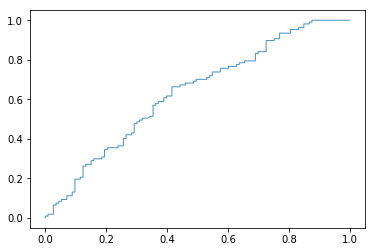

In [22]:
plt.plot(fpr, tpr, lw=1, alpha=0.8,
             label='ROC fold (AUC = %0.2f)' % roc_auc)

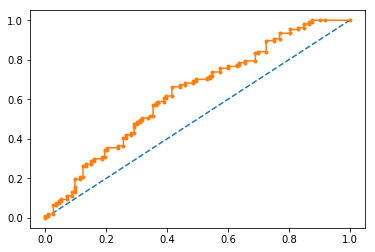

In [23]:
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

2) MNIST Dataset

Use from sklearn.datasets import fetch_mldata

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [25]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [26]:
mnist.data.shape

(70000, 784)

In [27]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [28]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
X = mnist.data
y = mnist.target

In [30]:
X.shape

(70000, 784)

In [31]:
y.shape

(70000,)

In [32]:
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [33]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [36]:
import time

variance = 1.0
n_components = train_img.shape[1]

model = LogisticRegression(solver='lbfgs')
start = time.time()
model.fit(train_img, train_lbl)
end =  time.time()
timing = end-start


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

In [37]:
# Predict for Multiple Observations (images) at Once
predicted = model.predict(test_img)
predicted

array(['0', '4', '1', ..., '1', '3', '0'], dtype=object)

In [38]:
# generate evaluation metrics
accuracy = (metrics.accuracy_score(test_lbl, predicted))
accuracy

0.9082